# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [4]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [5]:
data=pd.read_csv('EasyVisa.csv')
df=data.copy()#making a copy

## Data Overview

- Observations
- Sanity checks

In [6]:
df.head() #first 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
df.tail()#last 5 rows

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [8]:
df.describe().T #statistical summary

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- We can see 'no_of_employees' has as min a negative number. We need to investigate this observations. The average number of employees is approximately 5667.
- 'prevailing_wage': The average prevailing wage is approximately 74455
 minimum wage is 2.14 indicating a potential data issue, while the maximum wage is 319210.

In [9]:
negative=df[(df['no_of_employees']<0)] #Filtering for negative numbers in # employees
negative

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [10]:
negative.shape #getting the number of rows

(33, 12)

- There appears to be a potential type error in the column 'no_of_employees', where 33 rows contain negative values. To address this issue, we will convert these values into positive numbers.

In [11]:
df['no_of_employees']=[abs(number) for number in df['no_of_employees']] #changing the negatives with abs()
df[(df['no_of_employees']<0)].sum()

case_id                  0.0
continent                0.0
education_of_employee    0.0
has_job_experience       0.0
requires_job_training    0.0
no_of_employees          0.0
yr_of_estab              0.0
region_of_employment     0.0
prevailing_wage          0.0
unit_of_wage             0.0
full_time_position       0.0
case_status              0.0
dtype: float64

In [12]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- "case_id": there are 25,480 unique values, which means each case has a distinct identifier.
- "continent": there are six unique values for different continents. The most frequent continent is "Asia" whith 16861 observations.
- "education_of_employee": there are four unique values for different levels of education. The most common education level is "Bachelor's"  10234
- "has_job_experience": it has two unique values, indicating whether an employee has job experience or not. The most frequent value is "Y" with 14802 cases.
- "requires_job_training": has two unique values, indicating whether a job requires training or not. The most frequent value is "N," with 22525 cases.

- "region_of_employment": there are five unique values representing different regions of employment. The most common region is the "Northeast".

- "unit_of_wage" has four unique values, representing different units of measurement for wages. The most frequent unit is "Year".

- "full_time_position" has two unique values indicating whether a position is full-time or not. The most common value is "Y" 22773 cases.

- "case_status," has two unique values indicating whether a case is certified or not. The most frequent status is "Certified," with 17018 cases.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- There are 12 columnsm, from those 3 are numerical and 9 categorical.

In [14]:
df=df.drop(["case_id"], axis=1) #dropping the column that has uniques

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# creating label barplots with a function
def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [17]:
for column in df.columns:  #getting the values for each column
  print(df[column].value_counts())
  print('********'*50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
*****************************************************************************************************************************************************************************************************************************************************************************************************************

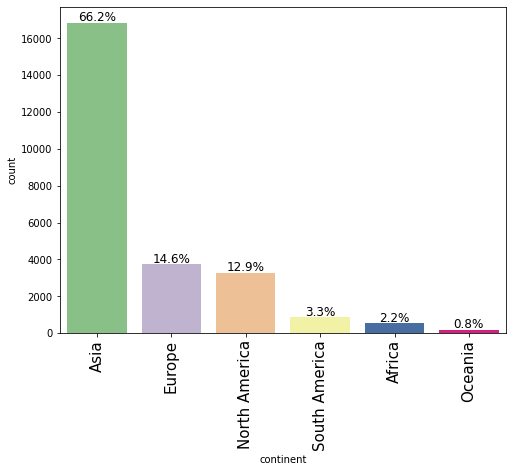

In [18]:
labeled_barplot(df,'continent')

- We can see that most cases are in Asia with around 66.2%. Following by Europe, 14.6% and North America with 12.9% of cases.

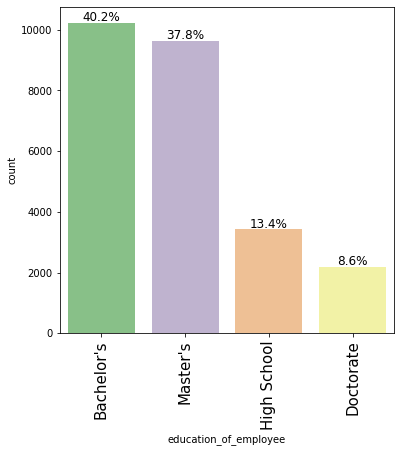

In [19]:
labeled_barplot(df,'education_of_employee')

- Bachelors and Masters have the most observations, around 40.2% following by Master's with 37.8%.

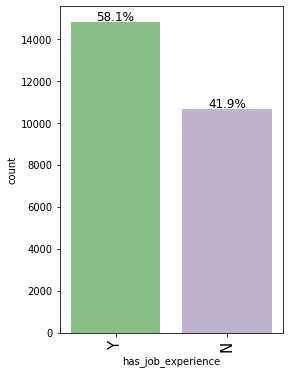

In [20]:
labeled_barplot(df,'has_job_experience')

- 58.8% of the people has job experience.

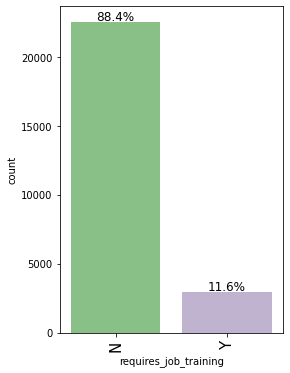

In [21]:
labeled_barplot(df,'requires_job_training')

- About 88.4% of the people did not required job training

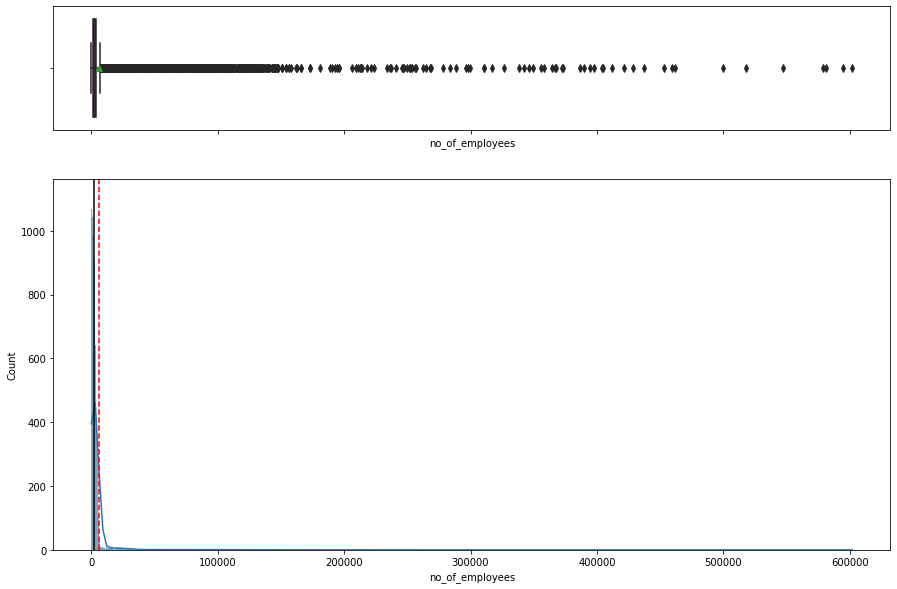

In [22]:
histogram_boxplot(df,'no_of_employees')

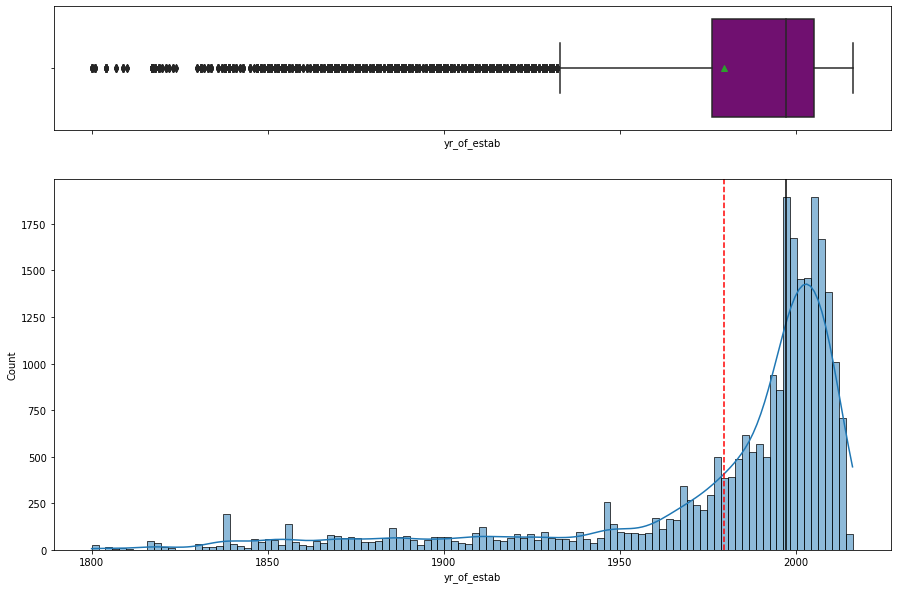

In [23]:
histogram_boxplot(df,'yr_of_estab')

- The distribution of 'yr_of_estab' is left skewed.

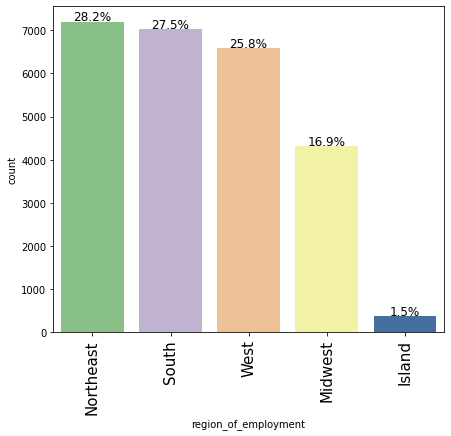

In [24]:
labeled_barplot(df,'region_of_employment')


- Northeast, south and west are the regions with more cases with similar proportions.

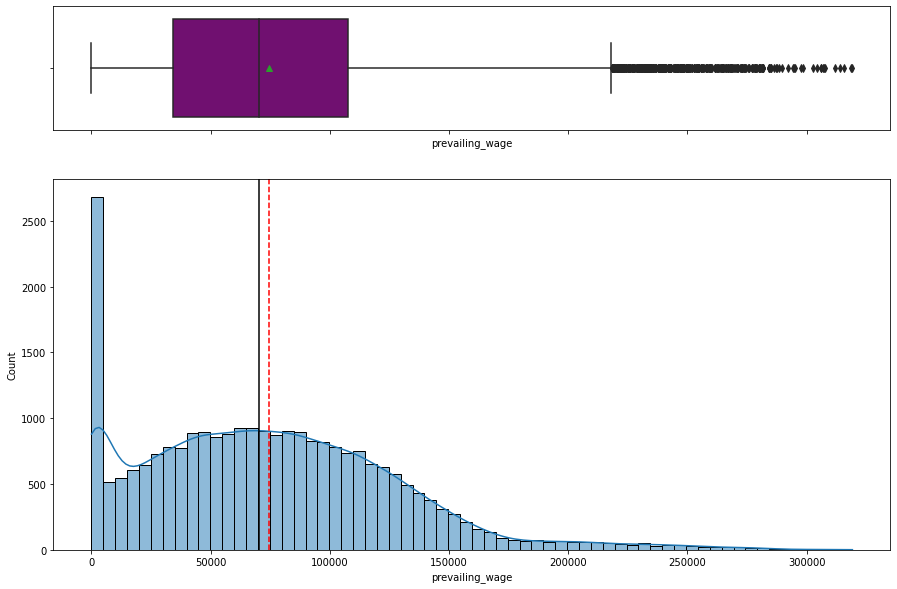

In [25]:
histogram_boxplot(df,'prevailing_wage')

- The distribution is right skewed and 75% of the data is below 150000

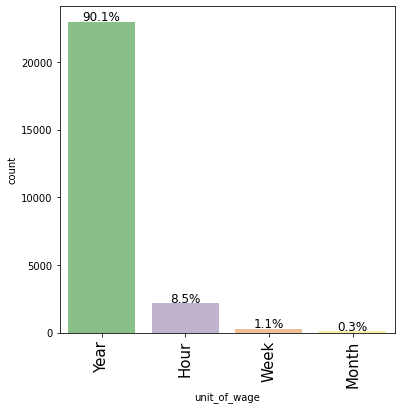

In [26]:
labeled_barplot(df,'unit_of_wage')

About 90% of the cases are in a year wage unit.

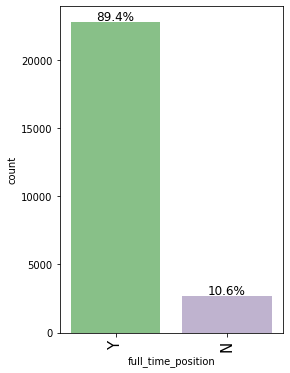

In [27]:
labeled_barplot(df,'full_time_position')

- 89.4% of the applicants have a full time position.

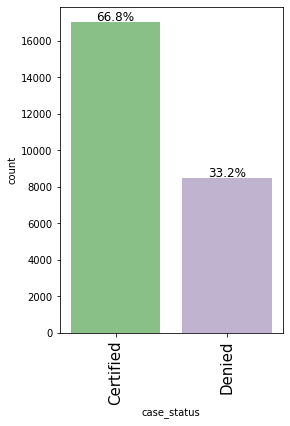

In [28]:
labeled_barplot(data,'case_status')

- 66.8% of the cases have been certified with a visa, while 33.2% have been denied.

### Bivariate Analysis

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [30]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Accent",
    )

    plt.tight_layout()
    plt.show()

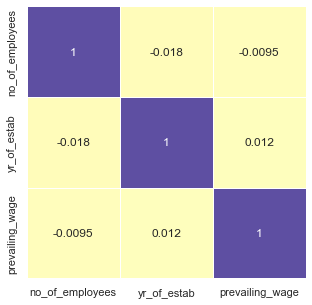

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(df.corr(),annot=True,linewidths=.5,center=0,cbar=False,cmap="Spectral")
plt.show()

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


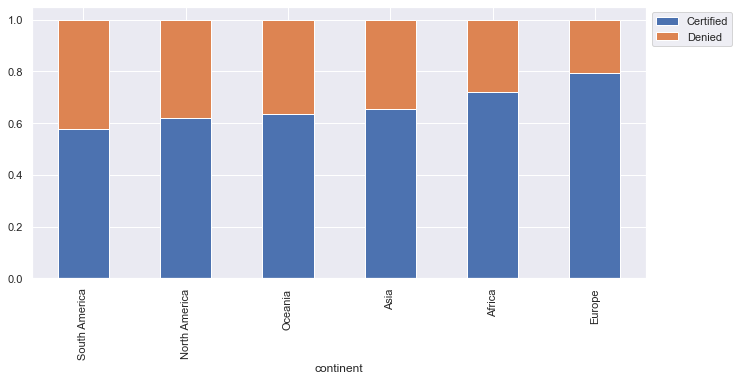

In [32]:
stacked_barplot(df,"continent","case_status" )

- South America seems to have the more denied cases followed by north america and Europe has the less cases denied.
- Asia has the most cases 16861, 66% from the total.
- The graph suggests that the continent of origin can influence the visa certification outcomes to some extent. Asia and Europe have higher numbers of cases and generally higher certification rates, indicating a relatively higher likelihood of visa approval for applicants from these continents.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


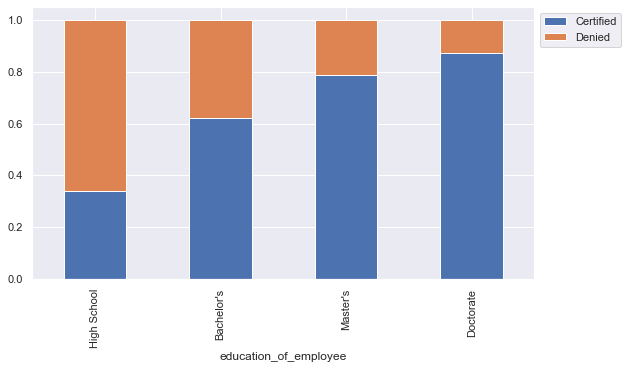

In [33]:
stacked_barplot(df,"education_of_employee","case_status" )

- It seems there is a pattern related to the education. Between more educated is the person is more likely to be certified with a visa.
- It appears that people with high school education are more likely to be certified with a visa.
- The highest number of cases is associated with individuals who have a Bachelor's degree (10,234 cases). Out of these cases, approximately 62% are certified, and approximately 38% are denied.
- The second-highest number of cases is associated with individuals holding a Master's degree (9,634 cases). Interestingly, a higher percentage of Master's degree holders (approximately 79%) have their cases certified compared to individuals with a Bachelor's degree.
- he dataset also includes cases of individuals with a High School education (3,420 cases). However, this education level has a relatively lower certification rate, with approximately 34% of cases being certified and approximately 66% being denied.
- There is a smaller number of cases associated with individuals holding a Doctorate degree (2,192 cases). Nevertheless, this education level has a high certification rate, with approximately 87% of cases being certified and approximately 13% being denied.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


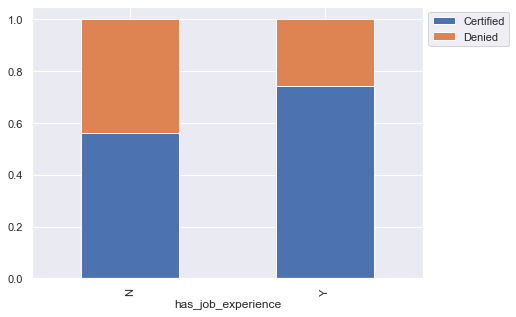

In [34]:
stacked_barplot(df,"has_job_experience","case_status" )

- People with job experience seem to be more likely to be certified compared to those without job experience. About 74% of people with job experience were certified, while only approximately 56% without job experience were certified.

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


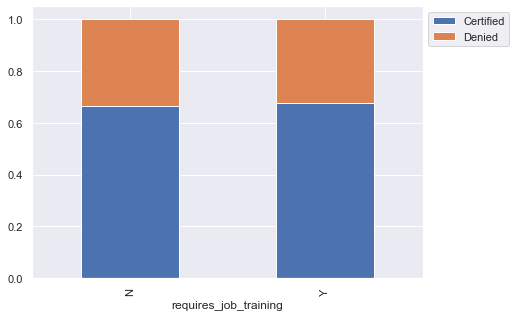

In [35]:
stacked_barplot(df,"requires_job_training","case_status" )

- It seems that having or not a job training does not have a significant impact on certified or denied visa. Approximately 68% of cases with a job training were certified, while approximately 67% of cases without a job training  were certified.

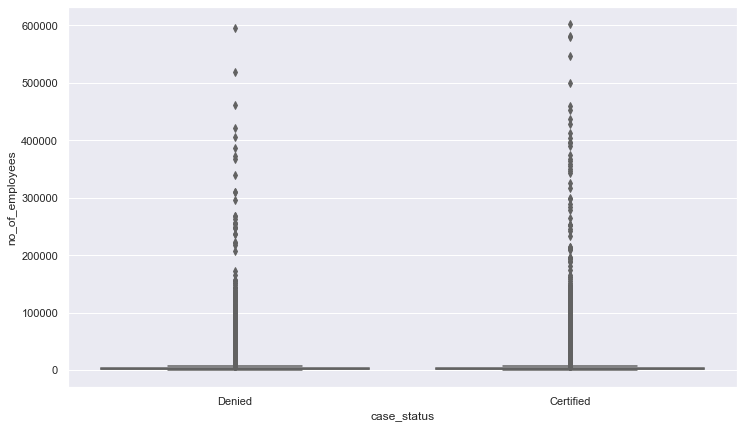

In [36]:
plt.figure(figsize=(12, 7))
sns.set_palette("Accent")
sns.boxplot(data=df, x="case_status", y="no_of_employees")
plt.show()

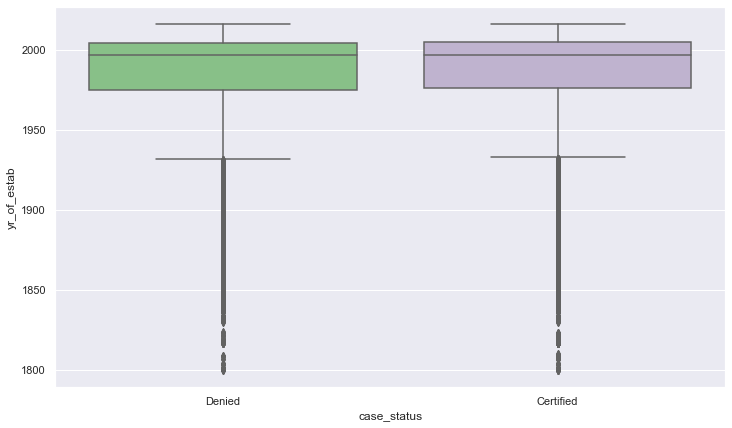

In [37]:
plt.figure(figsize=(12, 7))
sns.set_palette("Accent")
sns.boxplot(data=df, x="case_status", y="yr_of_estab")
plt.show()

- Certified cases and denied cases appears to follow a pretty similar pattern with yr_of_estab.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


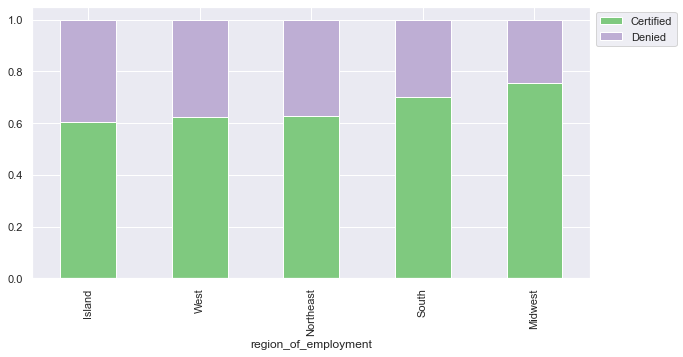

In [38]:
stacked_barplot(df,"region_of_employment","case_status" )

- Apparently there are not a significant difference bettween the regions of the employment.
- The Midwest region has the highest certified rate, with approximately 76% of cases being certified.
- The South region also has a relatively high proportion of certified cases of approximately 70%. The Northeast and West regions have similar proportions, both around 62-63%. The Island region has the lowest rate among the regions, with approximately 60% of cases being certified.

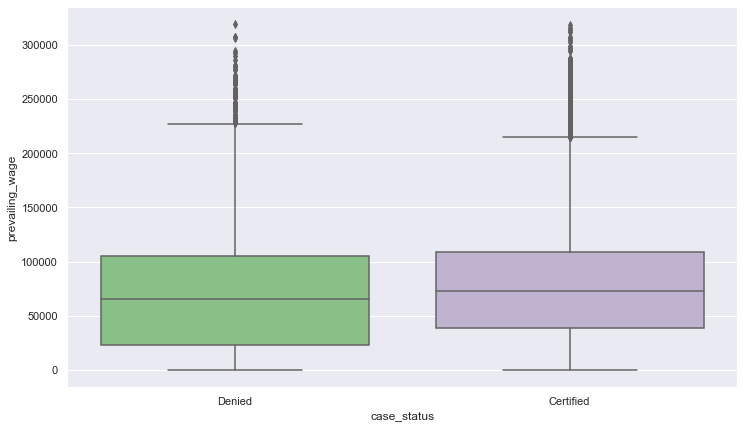

In [39]:
plt.figure(figsize=(12, 7))
sns.set_palette("Accent")
sns.boxplot(data=df, x="case_status", y="prevailing_wage")
plt.show()

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


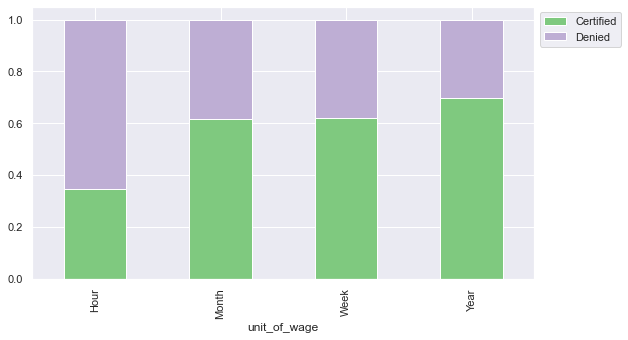

In [40]:
stacked_barplot(df,"unit_of_wage","case_status" )

- Apparently Unit Wage can have an impact on the visa to be certified or denied. Cases with wages measured in years tend to have higher certification rates compared to cases with wages measured in hours, weeks, or months.

- Cases with wages in years have the highest certification rate, with approximately 70% of cases being certified. Cases with wages in weeks and months have similar rates, around 62%. Cases with wages in hours have the lowest proportion of certified cases, with approximately 35% of cases being certified.

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


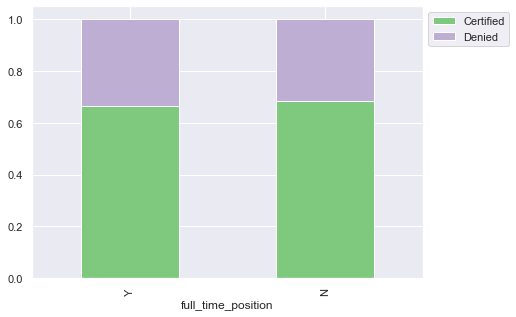

In [41]:
stacked_barplot(df,"full_time_position","case_status" )

- Full time position appears to not have a significant impact on visa status. Both of them have similar behaivor, approximately 67% of cases with a full-time position were certified, while approximately 68% of cases without a full-time position were certified.

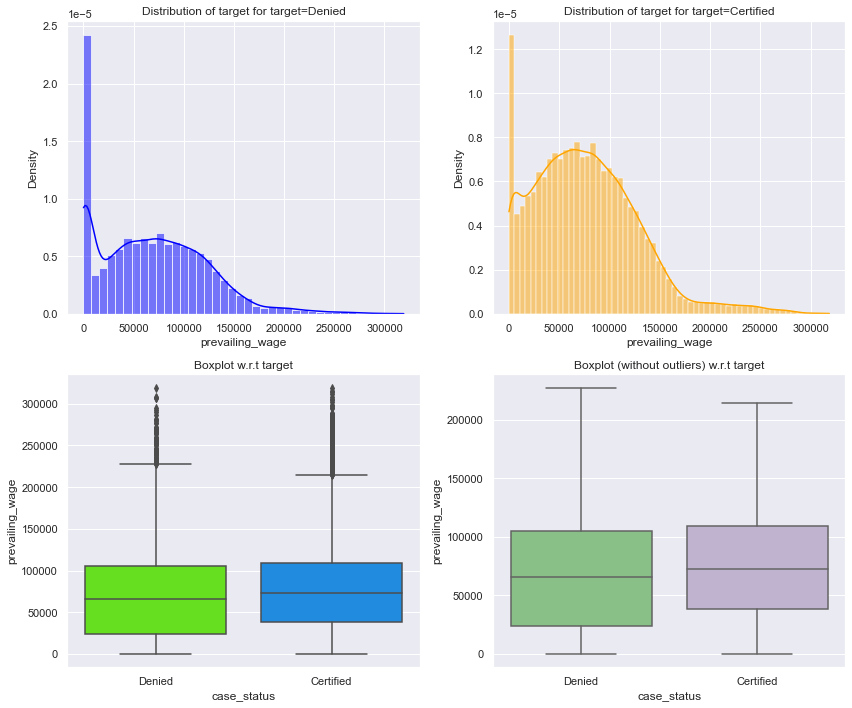

In [42]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

###Summary of EDA

According to the analysis we can highlight some patterns that may play a role in the visa certification:

1. Education: Higher education levels, such as Master's and Doctorate degrees, have a higher certification rate, indicating that advanced degrees increase the likelihood of visa certification.

2. Continent: The approval rates vary across continents, with Europe having the highest certification rate and South America having the lowest. This suggests that the visa status is influenced by the geographic region.

3. Work Experience: Cases with job experience have a higher certification rate compared to those without, indicating that work experience plays a significant role in visa status. Experienced professionals are more likely to be certified for visa applications.

4. Pay Unit: Visa cases with a yearly unit wage have the highest approval rate, while those with an hourly wage have the lowest. This implies that the payment interval is a factor in visa certification, with cases tied to a yearly wage being more likely to be certified.

5. Prevailing Wage: Certified visa cases tend to have higher prevailing wages compared to denied cases. This suggests that having a higher prevailing wage increases the chances of visa certification, as it indicates a higher level of compensation and may meet the government's requirements to protect local talent and foreign workers.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

  - We can observe that education does seem to play a role in visa certification. Here are the insights from the data:

    - Higher Certification Rate for Higher Education: Individuals with higher education levels, such as Master's and Doctorate degrees, have a higher certification rate for their visa applications. For example, approximately 79% of cases associated with individuals holding a Master's degree were certified, while approximately 87% of cases associated with individuals holding a Doctorate degree were certified. This suggests that having advanced degrees increases the likelihood of visa certification.

    - Variations in Certification Rates: The certification rates vary across different education levels. The highest certification rate is observed for individuals with a Doctorate degree, followed by Master's degree holders. On the other hand, individuals with a High School education have a relatively lower certification rate. This indicates that education level influences the probability of visa certification.

    - These observations support the notion that individuals with higher education levels may have an advantage when seeking a well-paid job abroad and obtaining visa certification. Higher education often indicates specialized skills, expertise, and qualifications, which are valued by immigration authorities when considering visa applications.

2. How does the visa status vary across different continents?

- The visa status varies across continents. Europe has the highest proportion of cases certified among the continents, with approximately 79% of cases being certified. Asia also has a relatively high aproval rate with approximately 65%. North America(62%), Africa(72%), and Oceania(64%) have similar proportions. South America has the lowest approval rate among the continents, with approximately 58% of cases being certified.

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

- For cases with and without job experience show a notable difference. Approximately 74% of cases with job experience were certified, while approximately 56% of cases without job experience were certified.

Thi suggest that work experience plays a significant role in case status. Cases with job experience have a higher certification rate compared to cases without job experience. This observation aligns with the idea that experienced professionals, who may have valuable skills, are more likely to be certified with a visas for career development and opportunities abroad.

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

- The approval rates for different pay units have some variation. Cases where employees have a yearly unit wage show highest approval rate at approximately 70%. Cases with weekly and monthly wage units have similar approval rates of around 62%. However, cases where employees are paid hourly have a lower approval rate (approximately 35%).

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

- The data shows that visa cases that are certified tend to have higher prevailing wages compared to the denied cases. This is indicated by the higher average, median, and the wage for 75%(upper quartile) of the data in the certified category. This suggests that having a higher prevailing wage is likely to increase the chances of a visa being certified.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [43]:
df.duplicated().sum() #checking duplicates

0

In [44]:
df.isnull().sum() #checking missing values

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are not missing values in the data set

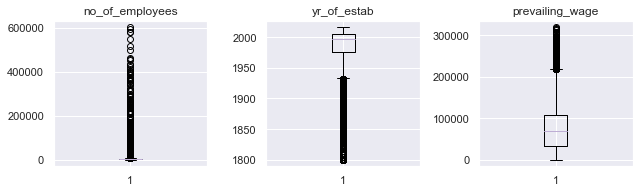

In [45]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable


plt.figure(figsize=(12, 10))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are ouliers but we decied to keep them because they are proper values.

In [46]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


##Preparation for modeling

In [47]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0) #changing our target variable to numeerical
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,1


##Model evaluation Criterion

The model can make wrong prediction:
1. The model can predict a visa applicaation will get certified, but it gets denied.
2. The model can predict a visa application will get denied, but it gets certified.

What case is more important?

1. If someone is approved for a job when they're not qualified, it means that a person who shouldn't have gotten the job will take it instead of an American worker who are prepared and have the right skills for the position. It would lead in decreased of opportunitys for qualified talent.

2. If someone is denied for a job when they're actually qualified, American companies won't be able to hire the right people for important positions. This can make it harder for businesses to succeed and for the economy to grow.

What metric to optimize?

- We choose f1-score to minimize false positives and false negatives. False positives (approving unqualified applicants) and false negatives (denying qualified applicants) can have significant consequences.

### Preparing data

In [48]:
# Defining a function to create a confusion matrix an check performance
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
X = df.drop("case_status", axis=1) #droping the target variable
y= df.pop("case_status")

In [51]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), #creating dummies
    drop_first=True,)
# to ensure all variables are of float type
X = X.astype(float)

X.head()


,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513.0,2007.0,592.2029,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2412.0,2002.0,83425.6500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,44444.0,2008.0,122996.8600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,98.0,1897.0,83434.0300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,1082.0,2005.0,149907.3900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1, stratify= y) #spliting the data 30% for test and 70% for training

In [53]:
print("Shape of Training set : ", X_train.shape) #checking the proportions, number of rows and columns
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


##Decision Tree

In [54]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

###Checking performance DT on Train data set

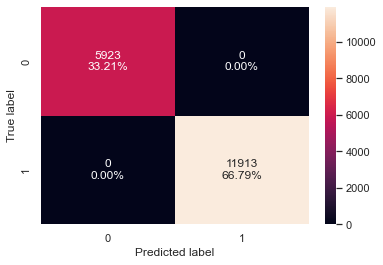

In [55]:
confusion_matrix_sklearn(dtree,X_train,y_train)

In [56]:
decision_tree_perf_train = model_performance_classification_sklearn(dtree,X_train,y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking performance DT on Test data set

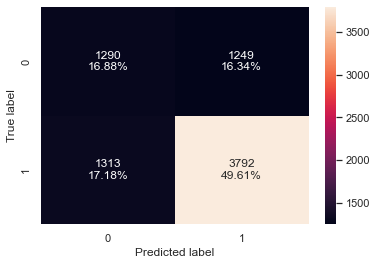

In [57]:
confusion_matrix_sklearn(dtree,X_test,y_test)

In [58]:
decision_tree_perf_test = model_performance_classification_sklearn(dtree,X_test,y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


- The decision tree is overfitting the training data.
- Let's see it the performance in the hyperparameter tuning imporives.

## Decision Tree Hyperparameter Tuning


In [59]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2,30),
    'min_samples_leaf': [3, 5, 7, 10],
    'max_leaf_nodes' : [2, 5, 9, 15],
    'min_impurity_decrease': [0.0001,0.1],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5,n_jobs = -1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

### Checking performance DT-tuned on Train data set

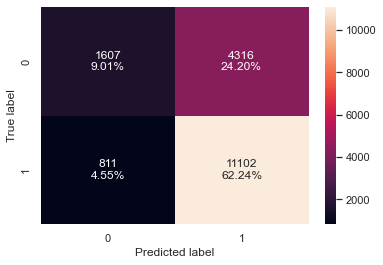

In [60]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)


In [61]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


### Checking performance DT-tuned on Test data set

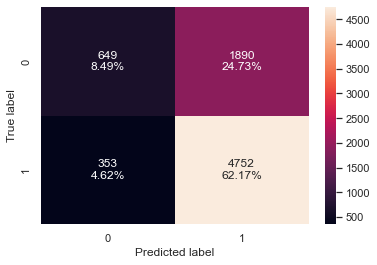

In [62]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [63]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


- The hyperparameter tuned decision tree is not overfiting, as well the F1 score has improved.
- F1 score for both the train and test datasets are 0.812 & 0.809 respectively

## Building bagging and boosting models

In [64]:
#base_estimator for bagging classifier is a decision tree by default
bagging_classifier=BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

### Checking performance Bagging on Train data set

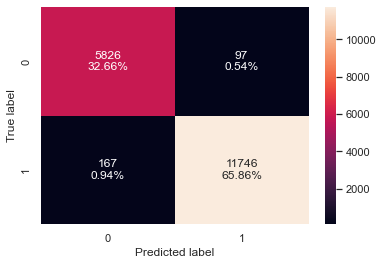

In [65]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [66]:
bagging_classifier_train=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_train

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


### Checking performance Bagging on Test data set

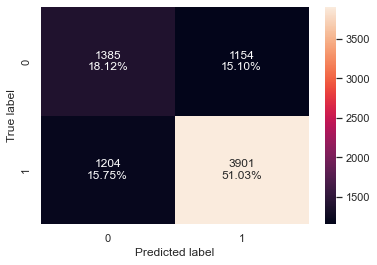

In [67]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [68]:
bagging_classifier_test=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_test

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


- The bagging model performs fine on the training data, but its performance on the test data is lower, indicating overfitting.
  - f1 in training data: 0.988887
  - f1 in test data: 0.767913
- let's check if the bagging with hyperparameters improve the performance.

## Bagging Classifier Hyperparameter Tuning


In [69]:
# Choose the type of classifier.
bagging_classifier_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.6,0.7,0.8,0.9,1],
              'max_features': [0.6,0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_classifier_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_classifier_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.6, max_samples=1, n_estimators=20,
                  random_state=1)

### Checking performance Bagging Tuned on Train data set

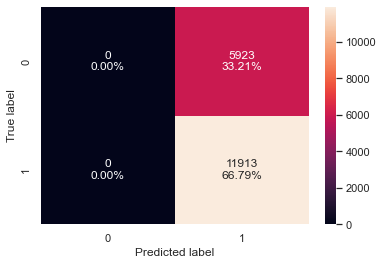

In [70]:
confusion_matrix_sklearn(bagging_classifier_tuned, X_train, y_train)

In [71]:
bagging_classifier_tuned_train=model_performance_classification_sklearn(bagging_classifier_tuned,X_train,y_train)
bagging_classifier_tuned_train

,Accuracy,Recall,Precision,F1
0,0.667919,1.0,0.667919,0.800901


### Checking performance Bagging Tuned on Test data set

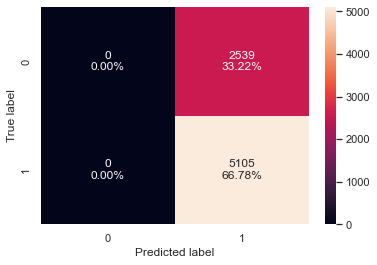

In [72]:
confusion_matrix_sklearn(bagging_classifier_tuned, X_test, y_test)

In [73]:
bagging_classifier_tuned_test=model_performance_classification_sklearn(bagging_classifier_tuned,X_test,y_test)
bagging_classifier_tuned_test

,Accuracy,Recall,Precision,F1
0,0.667844,1.0,0.667844,0.800847


- The bagging model with hyperparameter tuning improve the performance and shows consistent performance in terms of F1 score, suggesting that it is able to balance precision and recall effectively.
- Let's check how random forest.

## Random Forest

In [74]:
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

### Checking performance Random on Train data set

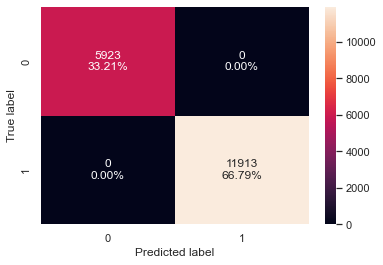

In [75]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [76]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
rf_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking performance Random on Train data set

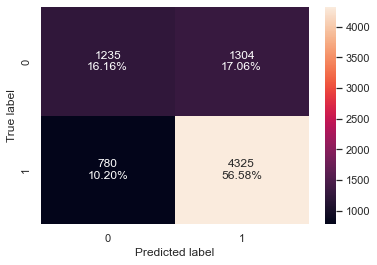

In [77]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [78]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
rf_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.727368,0.847209,0.768343,0.805851


- Random forest model with default values is overfitting the training data. Let's see if we can improve it with the hyperparameter tuning.

## Random Forest Hyperparameter Tuning

In [125]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=False, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='f1',cv=5, n_jobs= -1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       random_state=1)

### Checking performance Random-Tuned on Train data set

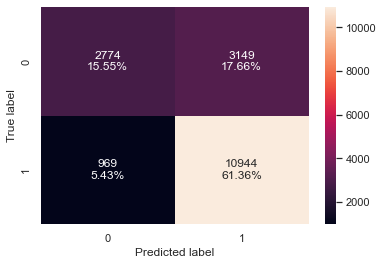

In [80]:
confusion_matrix_sklearn(rf_tuned,X_train,y_train)

In [126]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


### Checking performance Random-Tuned on Test data set

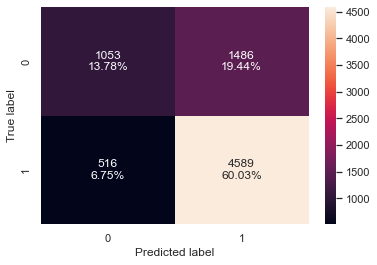

In [82]:
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

In [127]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


- The hyperparameter-tuned random forest model shows reasonably good performance on both the training and test data sets. The model shows high accuracy, recall, precision, and F1 score on both sets.

## AdaBoost Classifier

In [84]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

### Checking performance AdaBoost on Train data set

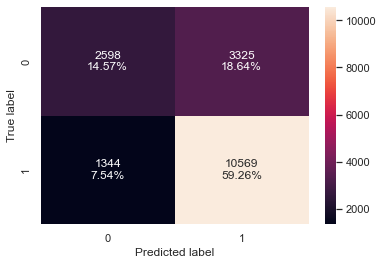

In [85]:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [86]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


### Checking performance AdaBoost on Test data set

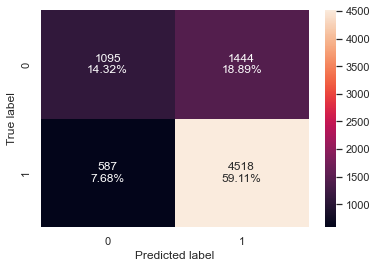

In [87]:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [88]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


- The AdaBoost model with default parameters have a good performance, with a good f1 of 81% in train data and a little low precision 75%.
- Let's see if we can get better performance in the hyperparameter tuning.

## AdaBoost Hyperparameter Tuning

In [89]:
abc_tuned= AdaBoostClassifier(random_state=1)
#Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

### Checking performance AdaBoost-Tuned on Train data set

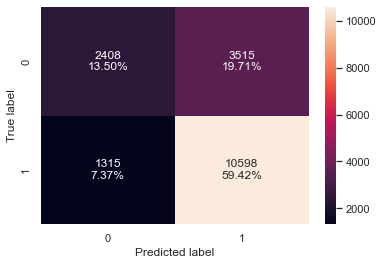

In [90]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [91]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.729199,0.889616,0.750939,0.814416


- The performance decrease a little bit.

### Checking performance AdaBoost-Tuned on Test data set

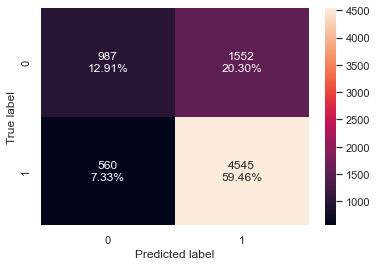

In [92]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [93]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723705,0.890304,0.745449,0.811462


- The performance of the AdaBoost model with hyperparameter tuning is similar the default model, as it gets similar precision and F1 score values on both the training and test datasets.

## Gradient Boosting Classifier

In [94]:
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

### Checking performance Gradient Boosting on Train data set

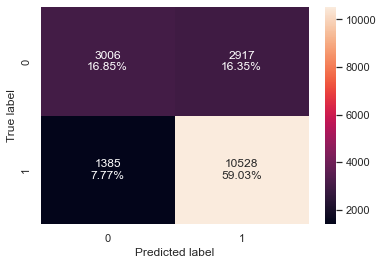

In [95]:
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [96]:
gb_classifier_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
gb_classifier_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


### Checking performance Gradient Boosting on Test data set

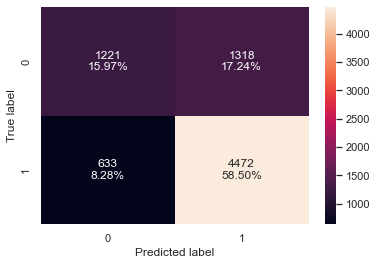

In [97]:
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [98]:
gb_classifier_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
gb_classifier_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


- The Gradient boosting model with defaults values is performing well, showing slightly higher accuracy, recall, precision, and F1 score values compared to the other models.

## Gradient Boosting Hyperparameter Tuning

In [99]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.9)

### Checking performance Gradient Boosting-Tuned on Train data set

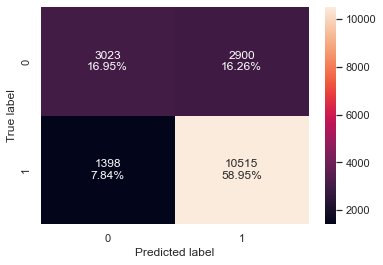

In [100]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [101]:
gbc_tuned_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.759027,0.882649,0.783824,0.830306


### Checking performance Gradient Boosting-Tuned on Test data set

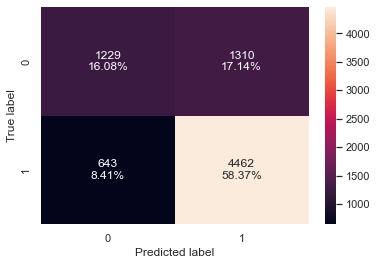

In [102]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [103]:
gbc_tuned_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.744505,0.874045,0.773042,0.820447


- The Gradient boosting tuned has similar performance than the one with default values. It achieves a good accuracy, recall, precision, and F1(0.8196) score values on both the training and test datasets.

## XGBoost Classifier

In [104]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

### Checking performance XGBoost on Train data set

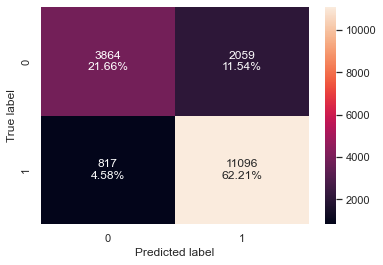

In [105]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [106]:
xgb_classifier_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_classifier_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


### Checking performance XGBoost on Test data set

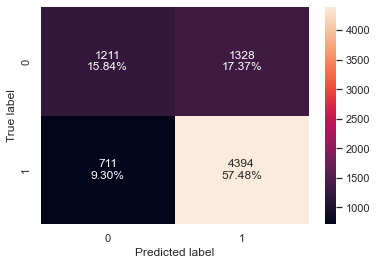

In [107]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [108]:
xgb_classifier_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_classifier_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


- XGBoost model with default parameters is not overfitting. It has a good that is approximately 81.16%, reflecting a balance between precision and recall.

## XGBoost Classifier Hyperparameter Tuning

In [109]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

### Checking performance XGBoost on Train data set

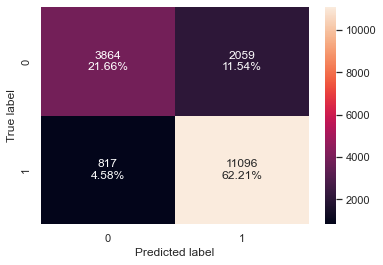

In [110]:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [111]:
xgb_tuned_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


### Checking performance XGBoost on Test data set

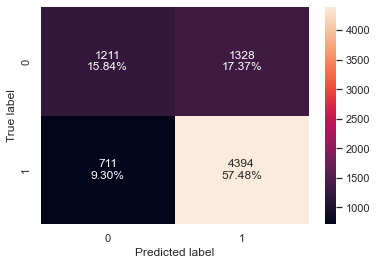

In [112]:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [113]:
xgb_tuned_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
xgb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


- XGBoost Classifier Tuned has a good performance but a little lower on F1 scores, compared to other models.

## Stacking Model

In [114]:
estimators = [("AdaBoost", ab_classifier),("Gradient Boosting", gb_classifier),("Random Forest", rf_tuned),]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_by...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking performance Stacking on Train data set

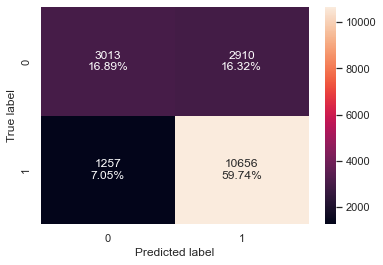

In [115]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [116]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.766371,0.894485,0.785493,0.836454


### Checking performance Stacking on Test data set

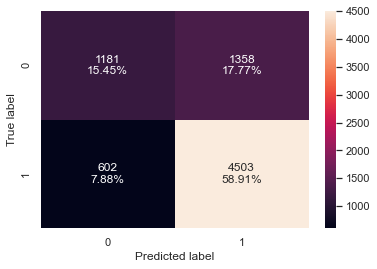

In [117]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [118]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74359,0.882076,0.768299,0.821266


- Stacking Classifier performs well, has a competitive performance. With an f1 in the test: 0.821266, and an f1 in train set:0.836930. And an accuracy, recall of precision with good performance as well.

## Model Performance Comparison and Conclusions

In [119]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T,dtree_estimator_model_train_perf.T,rf_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_train.T,bagging_classifier_tuned_train.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_train_perf.T,gbc_tuned_train_perf.T,xgb_classifier_train_perf.T,
    xgb_tuned_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = ["Decision Tree","Decision Tree Estimator","Random Forest Estimator","Random Forest Tuned","Bagging Classifier","Bagging Estimator Tuned",
                               "Adaboost Classifier","Adabosst Classifier Tuned","Gradient Boost Classifier","Gradient Boost Classifier Tuned","XGBoost Classifier",
                               "XGBoost Classifier Tuned","Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,1.0,0.769119,0.985198,0.667919,0.738226,0.729199,0.758802,0.759027,0.838753,0.838753,0.766371
Recall,1.0,0.931923,1.0,0.918660,0.985982,1.000000,0.887182,0.889616,0.883740,0.882649,0.931419,0.931419,0.894485
Precision,1.0,0.720067,1.0,0.776556,0.991810,0.667919,0.760688,0.750939,0.783042,0.783824,0.843482,0.843482,0.785493
F1,1.0,0.812411,1.0,0.841652,0.988887,0.800901,0.819080,0.814416,0.830349,0.830306,0.885272,0.885272,0.836454


In [120]:
# test performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T,dtree_estimator_model_test_perf.T,rf_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_test.T,bagging_classifier_tuned_test.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_test_perf.T,gbc_tuned_test_perf.T,xgb_classifier_test_perf.T,
    xgb_tuned_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = ["Decision Tree","Decision Tree Estimator","Random Forest Estimator","Random Forest Tuned","Bagging Classifier","Bagging Estimator Tuned",
                               "Adaboost Classifier","Adabosst Classifier Tuned","Gradient Boost Classifier","Gradient Boost Classifier Tuned","XGBoost Classifier",
                               "XGBoost Classifier Tuned","Stacking Classifier"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.727368,0.738095,0.691523,0.667844,0.734301,0.723705,0.744767,0.744505,0.733255,0.733255,0.743590
Recall,0.742801,0.930852,0.847209,0.898923,0.764153,1.000000,0.885015,0.890304,0.876004,0.874045,0.860725,0.860725,0.882076
Precision,0.752232,0.715447,0.768343,0.755391,0.771711,0.667844,0.757799,0.745449,0.772366,0.773042,0.767913,0.767913,0.768299
F1,0.747487,0.809058,0.805851,0.820930,0.767913,0.800847,0.816481,0.811462,0.820927,0.820447,0.811675,0.811675,0.821266


### Summary

- Decision Tree and Random Forest Estimator models tended to overfit the training data, as evidenced by their perfect accuracy on the training set but relatively lower performance on the test set.

- Bagging Classifier had an average performance compared with the others since it performed really well in training and dropped off considerably on the test dataset.

- Stacking Classifier performed well, achieving a competitive performance. With an f1 in the test: 0.821266, and an f1 in train set:0.836930 and an accuracy, recall of precision with good performance as well.

- Random Forest Tuned and Gradient Boost Classifier Tuned demonstrate a good balance between precision and recall, with higher F1 scores, considered the best two performers.

- XGBoost Classifier and XGBoost Classifier Tuned: Both XGBoost models achieve high F1 scores. These models perform well in terms of accuracy, recall, and precision as well.

- Considering both training and test performances, the top models are:
1. Random Forest Tuned
2. Gradient Boost Classifier
3. Stacking Classifier


### Feature importance of the best model

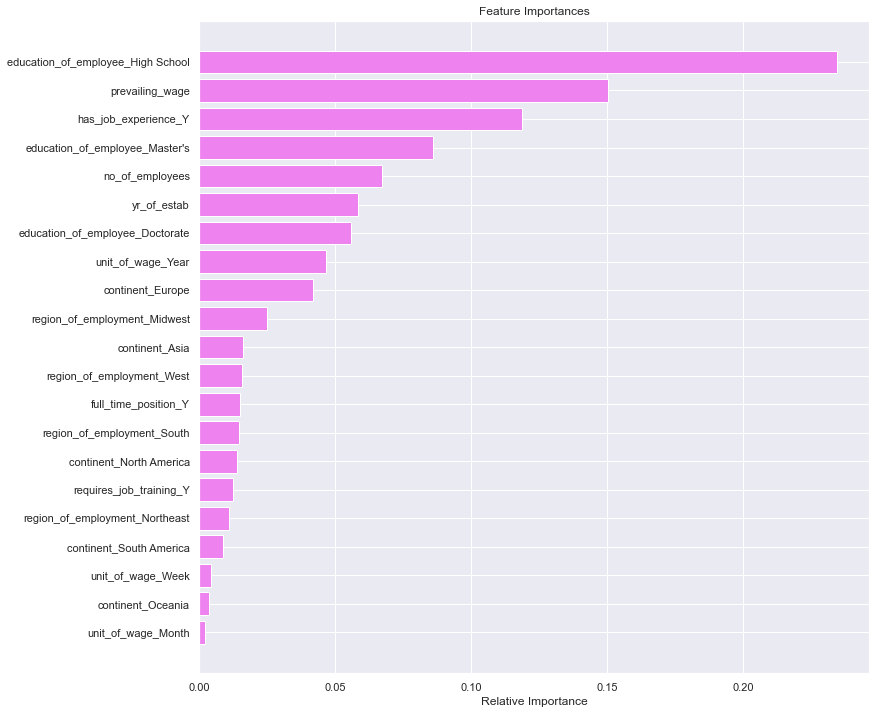

In [121]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

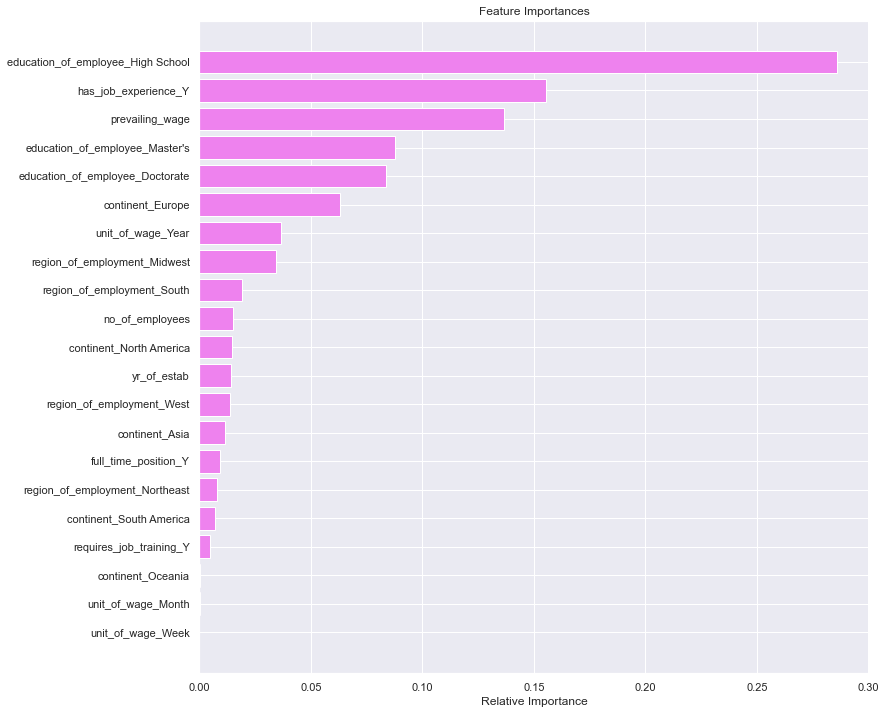

In [122]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations



### The top models considering both training and test performances are:

1. Random Forest Tuned
2. Gradient Boost Classifier
3. Stacking Classifier

- These models exhibit strong performance on both the training and test sets, indicating a good balance between overfitting and generalization.

### Recomendations:

- The OFLC can use the Random Forest Tuned model since it has shown promising performance in terms of accuracy, precision, recall, and F1 score. It can assist in highlighting the candidates that have higher chances of visa approval.

- To get more support the OFLC can also use the Gradient Boost Classifier  and stacking classifier to complement the Random Forest Tuned model. This can offer enhanced accuracy and robustness in the visa certification decision-making process.

- The Feature Importance Analysis tells us that the most important features are 'Education_of_employee_high_school',
'prevailing_wage',
'has_job_experience_Y',
'education_of_employee_Master's'

    - Higher Education Level: People with a higher level of education have a higher likelihood of getting certified. The OFLC can provide a disclaimer on their application website, highlighting that a higher education level increases the chances of certification. This can potentially decrease the number of applications from high schoolers and motivate them to pursue higher education, allowing the OFLC to focus on applicants with a higher probability of approval.

    - Prevailing Wage: Prevailing wage is a strong factor in the certification process. Case reviewers can compare the applicants' wages to the wages prevailing in the requested industry. By considering applicants with higher prevailing wages, the OFLC can prioritize candidates who are likely to meet the wage requirements, increasing their chances of certification.

    - Prior Job Experience: Applicants with prior job experience are more likely to get certified. Similar to the education disclaimer, the OFLC can include a disclaimer for applicants without job experience, informing them that having prior job experience significantly increases their chances of certification. This can, also help manage expectations and encourage applicants to wait until they have gained relevant work experience before applying.

    - Geographic Considerations: Applicants from Europe have a higher likelihood of certification compared to other countries. If the OFLC wants to maintain a diverse population, it may be beneficial to create a plan that take measures to equalize the application acceptance rates across all continents. This can ensure a fair and inclusive visa approval process. This analysis can help in understanding the decision-making process and guide future improvements in the visa approval system.

- It is important to keep monitoring and evaluating the performance of the implemented models. By collecting new data and re-training the models periodically, we ensure they remain effective in handling changing trends and patterns in visa applications.

The application of the model and the important features can help OFLC to improve the efficiency of the visa approval process, reduce manual effort, and provide recommendations for visa certification or denial.




